In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np

In [63]:
path = r'/content/DATASET_ (1).csv'
df = pd.read_csv(path, encoding='utf-8')
df.head()

,Unnamed: 0,major_code,major_name,subject_group,point,year,university_code,university_name
0,0,7520207,Kỹ thuật Điện tử viễn thông,A00; A01,25.60,2022,BVH,Học Viện Công Nghệ Bưu Chính Viễn Thông ( Phía...
1,1,7510301,"Công nghệ kỹ thuật Điện, điện tử",A00; A01,25.10,2022,BVH,Học Viện Công Nghệ Bưu Chính Viễn Thông ( Phía...
2,2,7480201,Công nghệ thông tin,A00; A01,27.25,2022,BVH,Học Viện Công Nghệ Bưu Chính Viễn Thông ( Phía...
3,3,7480202,An toàn thông tin,A00; A01,26.70,2022,BVH,Học Viện Công Nghệ Bưu Chính Viễn Thông ( Phía...
4,4,7480101,Khoa học máy tính,A00; A01,26.90,2022,BVH,Học Viện Công Nghệ Bưu Chính Viễn Thông ( Phía...


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6265 entries, 0 to 6264
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6265 non-null   int64  
 1   major_code       6265 non-null   object 
 2   major_name       6265 non-null   object 
 3   subject_group    6265 non-null   object 
 4   point            6265 non-null   float64
 5   year             6265 non-null   int64  
 6   university_code  6265 non-null   object 
 7   university_name  6265 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 391.7+ KB


In [65]:
df = df.drop(['Unnamed: 0'], axis=1)

In [66]:
df.to_csv('DATASET_.csv', index=True)

In [67]:
df['year'] = df['year'].astype('object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6265 entries, 0 to 6264
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   major_code       6265 non-null   object 
 1   major_name       6265 non-null   object 
 2   subject_group    6265 non-null   object 
 3   point            6265 non-null   float64
 4   year             6265 non-null   object 
 5   university_code  6265 non-null   object 
 6   university_name  6265 non-null   object 
dtypes: float64(1), object(6)
memory usage: 342.7+ KB


In [69]:
df_category = df.select_dtypes('object').columns.to_list()
df_numeric = df.select_dtypes(('float64')).columns.to_list()

In [70]:
df_category, df_numeric

(['major_code',
  'major_name',
  'subject_group',
  'year',
  'university_code',
  'university_name'],
 ['point'])

# Visualize

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


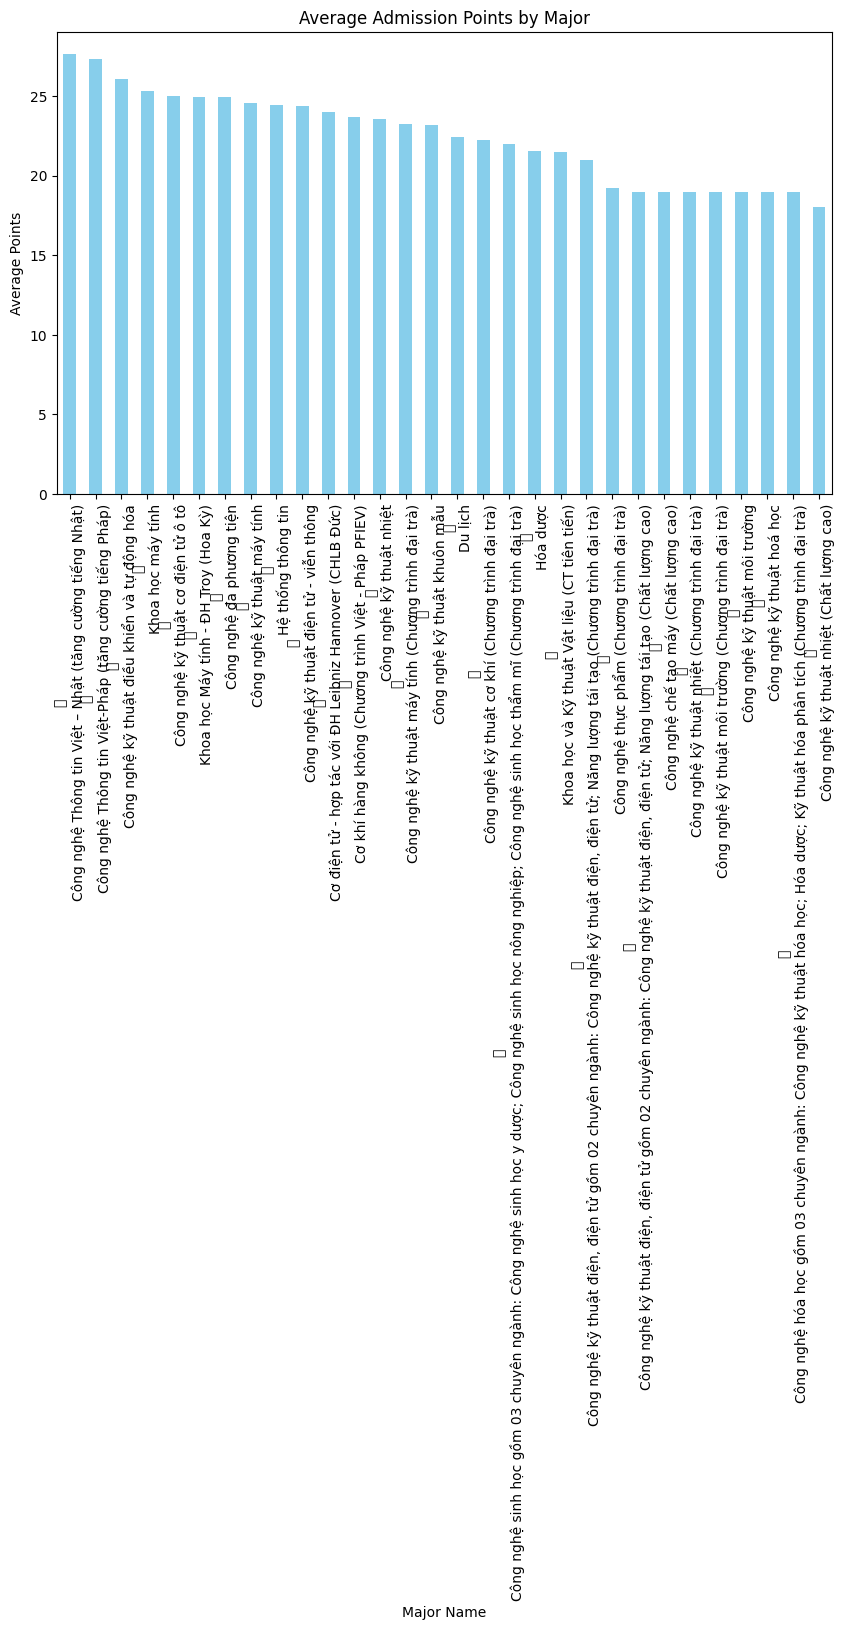

In [ ]:
df_major_point = df.groupby('major_name')['point'].mean().head(30)
df_major_point = df_major_point.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
df_major_point.plot(kind='bar', color='skyblue')
plt.title('Average Admission Points by Major')
plt.xlabel('Major Name')
plt.ylabel('Average Points')
plt.xticks(rotation=90)  # Rotate x-axis labels to avoid overlap
plt.show()

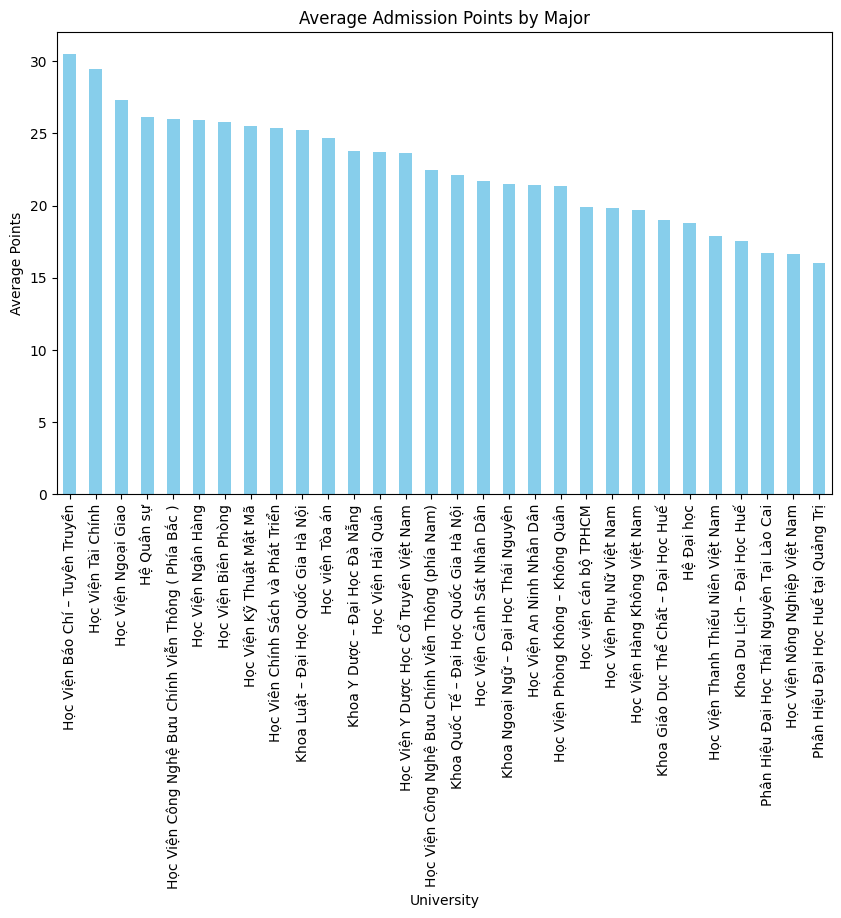

In [ ]:
df_major_point = df.groupby('university_name')['point'].mean().head(30)
df_major_point = df_major_point.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
df_major_point.plot(kind='bar', color='skyblue')
plt.title('Average Admission Points by Major')
plt.xlabel('University')
plt.ylabel('Average Points')
plt.xticks(rotation=90)  # Rotate x-axis labels to avoid overlap
plt.show()

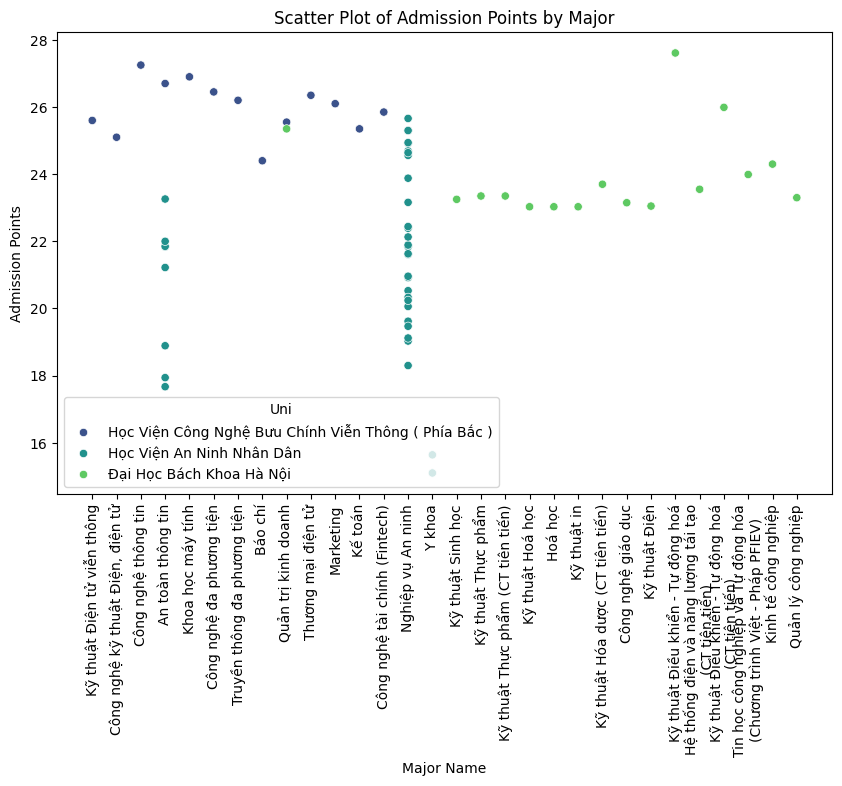

In [ ]:
df_point = df['point'].iloc[:67]
df_major = df['major_name'].iloc[:67]
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df_major, y=df_point, hue=df['university_name'].iloc[:100], palette='viridis')

# Customize the plot
plt.title('Scatter Plot of Admission Points by Major')
plt.xlabel('Major Name')
plt.ylabel('Admission Points')
plt.xticks(rotation=90)  # Rotate x-axis labels to avoid overlap
plt.legend(title='Uni')

plt.show()

In [71]:
X_category = df[df_category]

In [72]:
X_numeric = df[df_numeric]

In [73]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [74]:
onehot_encoder = OneHotEncoder()  # No need to specify sparse=False in recent versions
stand_encoder = StandardScaler()

# OneHotEncoding for categorical features
X_category_encoded = onehot_encoder.fit_transform(X_category)

# Convert the encoded matrix to a dense format (if needed) and to a DataFrame
X_category_encoded_df = pd.DataFrame(X_category_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(X_category.columns))

# Concatenate the encoded categorical features with the scaled numeric features
X_transformed = pd.concat([X_category_encoded_df, X_numeric], axis=1)

# Show the transformed data
X_transformed.head()

,major_code_106,major_code_107,major_code_108,major_code_109,major_code_110,major_code_112,major_code_114,major_code_115,major_code_117,major_code_120,...,university_name_Đại học Thành Đô,university_name_Đại học Thủ Dầu Một,university_name_Đại học Thủ Đô Hà Nội,university_name_Đại học Trần Quốc Tuấn,university_name_Đại học Tài Chính – Quản Trị Kinh Doanh,university_name_Đại học Tài Nguyên và Môi Trường Hà Nội,university_name_Đại học Tân Trào,university_name_Đại học Đà Nẵng,university_name_Đại Học Sư Phạm – Đại Học Thái Nguyên,point
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.60
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.10
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.25
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.70
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.90


In [75]:
y = X_transformed['point']
X = X_transformed.drop('point', axis=1)

In [76]:
X.head()

,major_code_106,major_code_107,major_code_108,major_code_109,major_code_110,major_code_112,major_code_114,major_code_115,major_code_117,major_code_120,...,university_name_Đại học Sao Đỏ,university_name_Đại học Thành Đô,university_name_Đại học Thủ Dầu Một,university_name_Đại học Thủ Đô Hà Nội,university_name_Đại học Trần Quốc Tuấn,university_name_Đại học Tài Chính – Quản Trị Kinh Doanh,university_name_Đại học Tài Nguyên và Môi Trường Hà Nội,university_name_Đại học Tân Trào,university_name_Đại học Đà Nẵng,university_name_Đại Học Sư Phạm – Đại Học Thái Nguyên
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
y.head()

,point
0,25.60
1,25.10
2,27.25
3,26.70
4,26.90


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=(0.2), shuffle=True, random_state=42)

In [80]:
print(f"X_train shape {X_train.shape}")
print(f"X_test shape {X_test.shape}")
print(f"y_train shape {y_train.shape}")
print(f"y_test shape {y_test.shape}")

X_train shape (5012, 4825)
X_test shape (1253, 4825)
y_train shape (5012,)
y_test shape (1253,)


# Reduction dimension

In [81]:
from sklearn.decomposition import PCA

# Initialize PCA with the desired number of components (or you can choose to keep 95% of the variance)
pca = PCA(n_components=0.97)  # Keeps 95% of the variance

# Fit PCA on the training data
X_train_pca = pca.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_pca = pca.transform(X_test)
# Check the new shapes of the transformed data
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)


X_train_pca shape: (5012, 1887)
X_test_pca shape: (1253, 1887)


# Model

In [82]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
# Ridge with l2 regularlization to prevent overfitting
ridge_model = Ridge(alpha=4.0)  # You can tune alpha using GridSearchCV or other methods

# Cross-validation for Ridge
ridge_cv_scores = cross_val_score(ridge_model, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Ridge CV Mean Squared Error (cross-validation): {-np.mean(ridge_cv_scores)}")

print("-" *50)
# Train both models
linear_model.fit(X_train_pca, y_train)
ridge_model.fit(X_train_pca, y_train)

# Make predictions
y_pred_linear_train = linear_model.predict(X_train_pca)
y_pred_ridge_train = ridge_model.predict(X_train_pca)
y_pred_linear = linear_model.predict(X_test_pca)
y_pred_ridge = ridge_model.predict(X_test_pca)

# Evaluate both models using Mean Squared Error (MSE) and R-squared (R²)
mse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train)
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)

mse_linear_train = mean_squared_error(y_train, y_pred_linear_train)
r2_linear_train = r2_score(y_train, y_pred_linear_train)


mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Output the results
print("Ridge Regression:")
print(f"Mean Squared Error Train: {mse_ridge_train}")
print(f"R-squared Train: {r2_ridge_train}")

print("\nRidge Regression:")
print(f"Mean Squared Error: {mse_ridge}")
print(f"R-squared: {r2_ridge}")

print("Linear Regression:")
print(f"Mean Squared Error Train: {mse_linear_train}")
print(f"R-squared Train: {r2_linear_train}")


print("Linear Regression:")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")


# Optionally, the coefficients to compare the effect of regularization
print("\nLinear Regression Coefficients:")
print(linear_model.coef_)

print("\nRidge Regression Coefficients:")
print(ridge_model.coef_)

# Optionally, compare intercepts
print("\nIntercept of Linear Regression:", linear_model.intercept_)
print("Intercept of Ridge Regression:", ridge_model.intercept_)


Ridge CV Mean Squared Error (cross-validation): 7.195484171777108
--------------------------------------------------
Ridge Regression:
Mean Squared Error Train: 4.238584299987866
R-squared Train: 0.919486338392799

Ridge Regression:
Mean Squared Error: 6.417698516611236
R-squared: 0.8740282909882032
Linear Regression:
Mean Squared Error Train: 2.8836459562795014
R-squared Train: 0.94522395255427
Linear Regression:
Mean Squared Error: 5.791180703746564
R-squared: 0.886326082697897

Linear Regression Coefficients:
[-4.23397411 -1.48638912  2.11103466 ... -0.11709516 -0.93622754
 -2.06614292]

Ridge Regression Coefficients:
[-4.22470547 -1.47659102  2.09587654 ... -0.0289871  -0.2315364
 -0.51070833]

Intercept of Linear Regression: 22.779844373503593
Intercept of Ridge Regression: 22.779844373503593


In [83]:
# MSE from cross-validation (7.2 is the average)
mse = 7.195484171777108

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Range of target variable (14 to 80)
target_range = 80 - 14
print(f"Target Range: {target_range}")

# Proportion of RMSE to target range
rmse_proportion = rmse / target_range
print(f"RMSE as a proportion of the target range: {rmse_proportion:.2f}")

RMSE: 2.682439966108675
Target Range: 66
RMSE as a proportion of the target range: 0.04


# Result

- RMSE: 2.68
~ This is the Root Mean Squared Error, which represents the average prediction error in the same units as your target variable. It means that, on average, your model's predictions are off by about 2.68 units.
- Target: 65 ~ the target values you're predicting span a total range of 66 units.
- RMSE as a proportion of the target range: 0.04 ~ This means that the RMSE is about 4% of the total target range
- 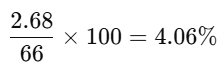
-> An RMSE less than 5% of the target range is usually seen as a strong performance -> This mean the model making predictions that not too far from actual values


In [84]:
import matplotlib.pyplot as plt

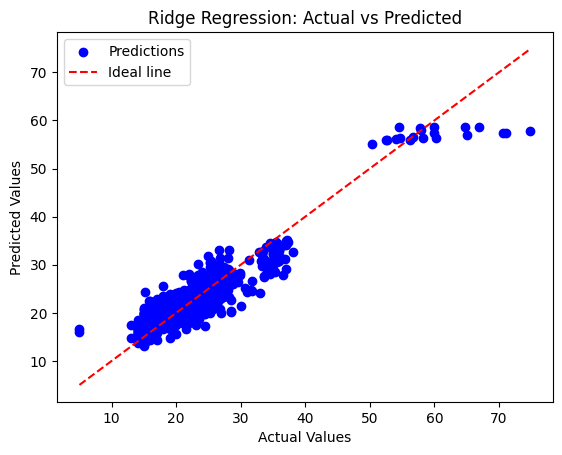

In [85]:
plt.scatter(y_test, y_pred_ridge, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual vs Predicted')
plt.legend()
plt.show()

- You can see the actual and model predict is kina same and the ideal line fit on points

In [86]:
from sklearn.svm import SVR

In [91]:
svr_model = SVR(epsilon=0.3, kernel='poly', C=5.0)
svr_model.fit(X_train_pca, y_train)
y_pred_svr_train = svr_model.predict(X_train_pca)
y_pred_svr = svr_model.predict(X_test_pca)

In [92]:
mse_svr_train = mean_squared_error(y_train, y_pred_svr_train)
r2_svr_train = r2_score(y_train, y_pred_svr_train)
mse_svr_test = mean_squared_error(y_test, y_pred_svr)
r2_svr_test = r2_score(y_test, y_pred_svr)
print("SVR:")
print(f"Mean Squared Error Train: {mse_svr_train}")
print(f"R-squared Train: {r2_svr_train}")
print(f"Mean Squared Error Test: {mse_svr_test}")
print(f"R-squared Test: {r2_svr_test}")

SVR:
Mean Squared Error Train: 3.6532237724611876
R-squared Train: 0.930605503683821
Mean Squared Error Test: 9.767787453100562
R-squared Test: 0.808270071343147


In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [89]:
regressor = DecisionTreeRegressor(random_state=42,
                                  max_depth=7)
cross_val_score(regressor, X_train_pca, y_train, cv=10)

array([0.54107448, 0.72041618, 0.60287971, 0.59219808, 0.62412643,
       0.52027121, 0.57412065, 0.72580931, 0.70689214, 0.64600496])

In [90]:
regressor.fit(X_train_pca, y_train)
y_pred_tree_train = regressor.predict(X_train_pca)
y_pred_tree = regressor.predict(X_test_pca)
mse_tree_train = mean_squared_error(y_train, y_pred_tree_train)
r2_tree_train = r2_score(y_train, y_pred_tree_train)
mse_tree_test = mean_squared_error(y_test, y_pred_tree)
r2_tree_test = r2_score(y_test, y_pred_tree)
print("Tree:")
print(f"Mean Squared Error Train: {mse_tree_train}")
print(f"R-squared Train: {r2_tree_train}")
print(f"Mean Squared Error Test: {mse_tree_test}")
print(f"R-squared Test: {r2_tree_test}")

Tree:
Mean Squared Error Train: 12.862835892157529
R-squared Train: 0.7556651129168068
Mean Squared Error Test: 20.02646918622089
R-squared Test: 0.6069044779323103


In [93]:
df_loss = pd.DataFrame({
    'Linear_Regression_MSE_train': mse_linear_train,
    'Ridge_Regression_MSE_train': mse_ridge_train,
    'SVR_MSE_train': mse_svr_train,
    'Tree_MSE_train': mse_tree_train,
    'Linear_Regression_MSE_test': mse_linear,
    'Ridge_Regression_MSE_test': mse_ridge,
    'SVR_MSE_test': mse_svr_test,
    'Tree_MSE_test': mse_tree_test

}, index=['loss'])
df_loss.head()

,Linear_Regression_MSE_train,Ridge_Regression_MSE_train,SVR_MSE_train,Tree_MSE_train,Linear_Regression_MSE_test,Ridge_Regression_MSE_test,SVR_MSE_test,Tree_MSE_test
loss,2.883646,4.238584,3.653224,12.862836,5.791181,6.417699,9.767787,20.026469


In [94]:
df_score = pd.DataFrame({
    'Linear_Regression_R2_train': r2_linear_train,
    'Ridge_Regression_R2_train': r2_ridge_train,
    'SVR_R2_train': r2_svr_train,
    'Tree_R2_train': r2_tree_train,
    'Linear_Regression_R2_test': r2_linear,
    'Ridge_Regression_R2_test': r2_ridge,
    'SVR_R2_test': r2_svr_test,
    'Tree_R2_test': r2_tree_test

}, index=['R2 score'])
df_score.head()

,Linear_Regression_R2_train,Ridge_Regression_R2_train,SVR_R2_train,Tree_R2_train,Linear_Regression_R2_test,Ridge_Regression_R2_test,SVR_R2_test,Tree_R2_test
R2 score,0.945224,0.919486,0.930606,0.755665,0.886326,0.874028,0.80827,0.606904


In [98]:
# Assuming you have a target_scaler that was used to scale y during training
# Apply inverse transformation to the predictions to get them back to the original scale
y_pred_linear_original = y_pred_linear.reshape(-1, 1)  # Reshape to 2D array
y_pred_ridge_original = y_pred_ridge.reshape(-1, 1)    # Reshape to 2D array
y_pred_tree_original = y_pred_tree.reshape(-1, 1)      # Reshape to 2D array
# Create a DataFrame to hold the unscaled predictions
df_predictions = pd.DataFrame({
    'Linear_Regression_Predictions': np.round(y_pred_linear_original, 2).flatten(),
    'Ridge_Regression_Predictions': np.round(y_pred_ridge_original, 2).flatten(),
    'Decision Tree Prediction': np.round(y_pred_tree_original, 2).flatten()
})

# Display the DataFrame with unscaled predictions
df_predictions.head()

,Linear_Regression_Predictions,Ridge_Regression_Predictions,Decision Tree Prediction
0,27.17,27.31,26.90
1,23.52,23.13,22.99
2,14.44,14.68,18.94
3,23.49,23.34,18.94
4,27.50,28.23,26.90


In [99]:
X_test_inverse_transform = onehot_encoder.inverse_transform(X_test)
X_test_inverse_transform

# Convert the NumPy array to a DataFrame
df = pd.DataFrame(X_test_inverse_transform, columns=['major_code',
                                                     'major_name',
                                                     'subject_group',
                                                     'year',
                                                     'university_code',
                                                     'university_name'])

df_combination = pd.concat([df, df_predictions], axis=1)
df_combination.head()

,major_code,major_name,subject_group,year,university_code,university_name,Linear_Regression_Predictions,Ridge_Regression_Predictions,Decision Tree Prediction
0,7380107,Luật kinh tế,A00; A01; D01; D07,2024,HCP,Học Viện Chính Sách và Phát Triển,27.17,27.31,26.90
1,7380101,Luật,A01,2022,HTA,Học viện Tòa án,23.52,23.13,22.99
2,7229042,Quản lý văn hóa,C00; C15; C20; D66,2022,DVD,"Đại Học Văn Hóa, Thể Thao Và Du Lịch Thanh Hóa",14.44,14.68,18.94
3,7220201H,Ngôn ngữ Anh (học tại Khu Hòa An),D01; D14; D15,2022,TCT,Đại Học Cần Thơ,23.49,23.34,18.94
4,ACT04,Kiểm toán,A00; A01; D01; D07,2024,NHH,Học Viện Ngân Hàng,27.50,28.23,26.90


In [97]:
df_combination = df_combination.drop(['year', 'Linear_Regression_Predictions'], axis=1)
df_combination.head()

,major_code,major_name,subject_group,university_code,university_name,Ridge_Regression_Predictions
0,7380107,Luật kinh tế,A00; A01; D01; D07,HCP,Học Viện Chính Sách và Phát Triển,27.31
1,7380101,Luật,A01,HTA,Học viện Tòa án,23.13
2,7229042,Quản lý văn hóa,C00; C15; C20; D66,DVD,"Đại Học Văn Hóa, Thể Thao Và Du Lịch Thanh Hóa",14.68
3,7220201H,Ngôn ngữ Anh (học tại Khu Hòa An),D01; D14; D15,TCT,Đại Học Cần Thơ,23.34
4,ACT04,Kiểm toán,A00; A01; D01; D07,NHH,Học Viện Ngân Hàng,28.23


# Menu user input


In [ ]:
major, point, subject = None, None, None

def user(user_input):
    """
      user input:
      return major, point, subject as output
    """
    global major, point, subject
    try:
        if user_input == '1':
            major = str(input('Please input your major: ')).strip()  # Cleanup spaces
        elif user_input == '2':
            point = float(input('Please input your THPT point: '))
        elif user_input == '3':
            subject = str(input('Please input your subject group: ')).strip()  # Cleanup spaces
        elif user_input == '4':
            return major, point, subject
    except Exception as e:
        print(f"Error: {e}")
    return major, point, subject # Return if none to continue the main


def find_schools(df, major, point, subject):

    """
      School list:
      retrun a list of school that match along major, subject, point
    """
    eligible_schools = []

    # Iterate over the dataframe to find eligible universities
    for _, row in df.iterrows():
        # Split the subject_group by ';' and clean up the spaces around each subject
        subject_group = row['subject_group'].split(';')
        subject_group = [sub.strip().upper() for sub in subject_group]  # Normalize case and strip spaces

        # Normalize the major_name to lower case for case-insensitive comparison
        major_name = row['major_name'].strip().lower()

        # Normalize the user input for case-insensitive comparison
        if major.lower() in major_name and subject.upper() in subject_group and point >= row['Ridge_Regression_Predictions']:
            eligible_schools.append(row['university_name'])

    return eligible_schools


while True:
    print('Press 1 to input major')
    print('Press 2 to input THPT point')
    print('Press 3 to input subject group')
    print('Press 4 to exit')

    user_input = input("Your choice: ")

    major, point, subject = user(user_input)

    # Checkinput
    print(f"Major: {major}, Point: {point}, Subject: {subject}")

    # School output if match all input
    if major and point and subject:
        eligible_schools = find_schools(df_combination, major, point, subject)
        if eligible_schools:
            print("You can be accepted to the following universities:")
            for school in eligible_schools:
                print(school)
        else:
            print("No universities found based on your input.")

    if user_input == '4':
      break

    print("-" * 50)

Press 1 to input major
Press 2 to input THPT point
Press 3 to input subject group
Press 4 to exit
Your choice: 4
Major: None, Point: None, Subject: None
